# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

# How will Houston Data Science cover the course?
The Stanford online course covers the entire book in 9 weeks and with the R programming language. The pace that we cover the book is yet to be determined as there are many unknown variables such as interest from members, availability of a venue and general level of skills of those participating. That said, a meeting once per week to discuss the current chapter or previous chapter solutions is the target.


# Python in place of R
Although R is a fantastic programming language and is the language that all the ISLR labs are written in, the Python programming language, except for rare exceptions, contains analgous libraries that contain the same statistical functionality as those in R.

# Notes, Exercises and Programming Assignments all in the Jupyter Notebok
ISLR has both end of chapter problems and programming assignments. All chapter problems and programming assignments will be answered in the notebook.

# Replicating Plots
The plots in ISLR are created in R. Many of them will be replicated here in the notebook when they appear in the text

# Book Data
The data from the books was downloaded using R. All the datasets are found in either the MASS or ISLR packages. They are now in the data directory. See below

In [1]:
!ls data

Advertising.csv caravan.csv     hitters.csv     khan_ytrain.csv smarket.csv
Credit.csv      carseats.csv    khan_xtest.csv  nci60_data.csv  usarrests.csv
auto.csv        college.csv     khan_xtrain.csv nci60_labs.csv  wage.csv
boston.csv      default.csv     khan_ytest.csv  portfolio.csv   weekly.csv


# ISLR Videos
[All Old Videos](https://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/)

# Chapter 7 Moving Beyond Linearity
Linearity is almost always an approximation, need more flexible models.

## Polynomial Regression
Extend linear model with polynomial terms. It's still a linear model but can model non-linear data. Usually don't use polynomial terms higher than degree 3 or 4.

## Step Functions
Cut X into K different regions and fit a constant to each region. The model reduces to $\hat{y} = \beta_0 + \beta_k$ where k is the kth region. $\beta_0$ is just the estimate for y (the mean) in the region before the first cut point. Can use same approach for logistic regression to get a flat probability estimate for each region.

## Basis functions
Polynomial terms and step function are both types of basis functions. A basis function is a function that transforms X. For polynomial regression, this is simply raising X to a power and for step functions this is transforming X into 0 or 1 based on whether X is in a region or not (indicator variable). Wavelets and fourier series are also basis functions.

## Regression Splines
Combining piecewise functions and polynomial regression
### Piecewise polynomials
Fit low degree polynomials over different regions of X. The place where the region ends are called knots. Without constraints the many pieces will not connect - be continuous. 
### Splines
Piecewise polynomials with constraints that the curves be continuous and smooth - meaning both first and second derivatives must match at the knot. Fitting a spline turns out to be surprisingly simpler than it seems. We don't have to fit a 3 degree polynomial for each region. By smartly choosing basis functions, we can use least squares to solve for all the coefficients. We use the truncated power basis function which is $h(x, \xi) = (x -\xi)^3, x > \xi$ and 0 otherwise. Each $\xi$ is a knot.

The equation to send to least squares is $\hat{y} = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 +  h(x, \xi_k) + ...$ where we have K truncated power tranformations for a total of K + 4 predictors.

### How to choose K?
Cross validation

### Splines vs polynomical regression
Splines generally do better. A complex fit can still be fit well with a 3 degree spline but it could take a very high degree polynomial to do the same and with worse variance.

## Smoothing splines
Finding a function that minimizes RSS but that is 'smooth'. Smoothness here is defined as having a relatively stable second derivative. Use a penalty term on the sum (integral) of the squared second derivative. We want smoothness, ie. stable second derivative. 

The function that minimizes this error is a natural cubic spline with knots at each unique value of x but with shrunken parameter estimates due to the penalty term. The smoothing parameter is very important to control variance. Choose smoothing parameter with CV.

## Local Regression
Fits a new regression line to each point by using the nearest neighbors of that point. It uses weighted least squares, weighing points at the boundary and beyond 0 and points in the boundary a decreasing function of its distance to the point. Usually, small degree polynomials are fit to these local points. Need to choose weight function and span of points. Larger span of points the smoother function you will get.

Can even do local regression with pairs or more of variables but because of the curse of dimensionality, there might not be enough neighbors.

## General Additive Models
The above models all relate to single variable predictions. GAMs simply add different linear models above (like the ones above) for different variables in the model, allowing for multivariate regression/classification. Each variable gets its own model and is added together. Each own model is a building block for a GAM.

## Multivariate Adaptive Regression Splines
https://en.wikipedia.org/wiki/Multivariate_adaptive_regression_splines

# Lab 7.8.1
Recreating plot 7.1

In [2]:
import pandas as pd
import numpy as np

In [3]:
wage = pd.read_csv("data/wage.csv")

In [20]:
# Use sklearn to get regression coefficients
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [34]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [35]:
X = wage[['age']]
y = wage['wage']

In [36]:
model = LinearRegression()

In [37]:
model.fit(poly.fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Coefficients are the same as in ISLR
model.intercept_, model.coef_

(-184.15417977414711,
 array([  2.12455205e+01,  -5.63859313e-01,   6.81068771e-03,
         -3.20383037e-05]))

In [40]:
model.intercept_

-184.15417977414711

### Standard error in  Scikit-learn
Sklearn doesn't supply the standard error so you'll have to write the formula yourself or use statsmodels

In [42]:
import statsmodels.formula.api as smf

In [47]:
results = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 13 Sep 2016   Prob (F-statistic):           2.77e-57
Time:                        17:02:25   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002      -301.879   -66.430
age                 21.2455      5.887      3.609      0.000         9.703    32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006        -0.968    -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026         0.001     0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051     -6.42e-05  1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
results.bse

Intercept           60.040377
age                  5.886748
np.power(age, 2)     0.206108
np.power(age, 3)     0.003066
np.power(age, 4)     0.000016
dtype: float64

In [51]:
results.conf_int()

,0,1
Intercept,-301.878732,-6.642963e+01
age,9.703041,3.278800e+01
"np.power(age, 2)",-0.967987,-1.597312e-01
"np.power(age, 3)",0.000799,1.282223e-02
"np.power(age, 4)",-0.000064,1.447431e-07


### Confidence interval for the mean
There are different confidence intervals for the mean (the regression line) and prediction. Prediction intervals are going to be much wider. The regression line will not wiggle around so much

In [54]:
from statsmodels.stats.outliers_influence import summary_table

In [55]:
st, data, ss2 = summary_table(results, alpha=0.05)

In [58]:
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

In [93]:
order = np.argsort(X.values.flatten())
x_o = X.values.flatten()[order]

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

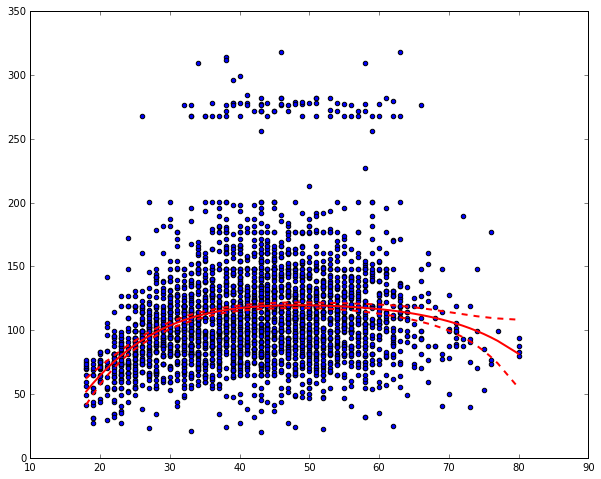

In [102]:
plt.figure(figsize=(10, 8))
plt.scatter(x_o, y[order])
plt.plot(x_o, fittedvalues[order], 'r', lw=2)
plt.plot(x_o, predict_mean_ci_low[order], 'r--', lw=2)
plt.plot(x_o, predict_mean_ci_upp[order], 'r--', lw=2)

In [107]:
# Which features are necessary
smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Tue, 13 Sep 2016   Prob (F-statistic):           2.77e-57
Time:                        17:37:50   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002      -301.879   -66.430
age                 21.2455      5.887      3.609      0.000         9.703    32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006        -0.968    -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026         0.001     0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051     -6.42e-05  1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
from statsmodels.stats.api import anova_lm

# Use Anova to test wheter each additional polynomial term is significant
Models must be nested here, meaning that mod2 must be a superset of mod1

In [117]:
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()

In [116]:
# Same as ISLR
# polynomial terms 4 and 5 are not needed. p > .05
anova_lm(mod1, mod2, mod3, mod4, mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


# Logistic regression
Prediciton of greater than 250k in income

In [120]:
wage['wage_250'] = (wage['wage'] > 250) * 1

In [269]:
results = smf.logit('wage_250 ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


In [270]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Sep 2016   Pseudo R-squ.:                 0.04013
Time:                        18:51:35   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
                                        LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022      -202.956   -16.150
age                  8.9950      4.187      2.148      0.032         0.789    17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037        -0.547    -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043         0.000     0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049     -3.89e-05 -6.41e-08
====================================================================================
"""

In [271]:
y_hat = np.exp(results.fittedvalues)
y = wage['wage_250'].values
x = X['age'].values
x_mean = x.mean()
n = len(y)

In [272]:
sy = np.sqrt(np.sum((y - y_hat)**2) / (n - 2))
sx = np.sum((x - x_mean) ** 2) / n
x_s = (x - x_mean) ** 2

In [273]:
sx = np.sum(x ** 2) - (x.sum() ** 2) / n

In [279]:
err = sy * np.sqrt(1/n + x_s / x_s.sum())

In [280]:
order = np.argsort(x)
x_o = x[order]

(0, 0.07)

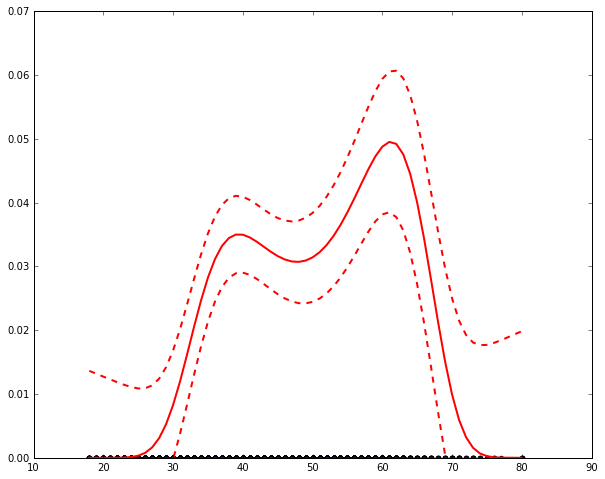

In [294]:
plt.figure(figsize=(10, 8))
plt.scatter(x_o, y[order])
plt.plot(x_o, y_hat[order], 'r', lw=2)
plt.plot(x_o, y_hat[order] + 2 * err[order], 'r--', lw=2)
plt.plot(x_o, y_hat[order] - 2 * err[order], 'r--', lw=2)
plt.ylim(0, .07)

# Step function as in 7.2
use pd.cut

In [308]:
results = smf.ols('wage ~ pd.cut(age, 4)', data=wage).fit()

In [309]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Tue, 13 Sep 2016   Prob (F-statistic):           1.13e-41
Time:                        19:03:26   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept                       94.1584      1.476     63.790      0.000        91.264    97.053
pd.cut(age, 4)[T.(33.5, 49]]    24.0535      1.829     13.148      0.000        20.466    27.641
pd.cut(age, 4)[T.(49, 64.5]]    23.6646      2.068     11.443      0.000        19.610    27.719
pd.cut(age, 4)[T.(64.5, 80]]     7.6406      4.987      1.532      0.126        -2.139    17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splines

In [322]:
import scipy.interpolate as si

In [323]:
y = wage['wage'].values

In [324]:
order = np.argsort(x)

In [351]:
x_sort = x[order]
y_sort = y[order]
t = np.array([25, 40, 60])

In [352]:
spl = si.LSQUnivariateSpline(x_sort, y_sort, t)

In [353]:
spl(x_sort)

array([ 60.49371419,  60.49371419,  60.49371419, ...,  77.09985645,
        77.09985645,  77.09985645])

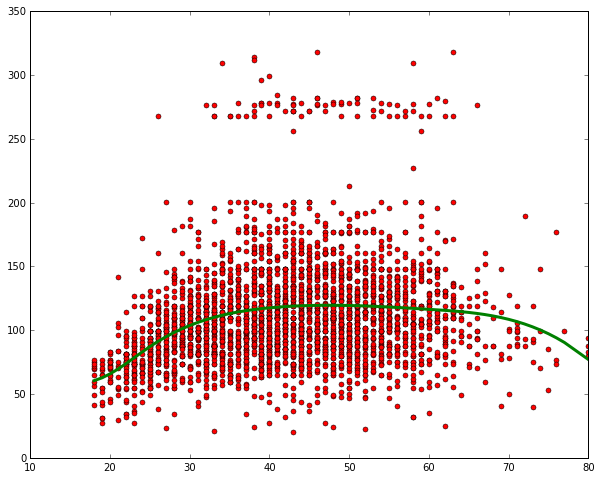

In [356]:
plt.figure(figsize=(10,8))
plt.plot(x_sort, y_sort, 'ro', ms=5)
plt.plot(x_sort, spl(x_sort), 'g-', lw=3);

# General additive models in python
not much available. Best to use R

# Exercises

# 1 Cubic Spline regression
a) Since x < $\xi$ then $a_1 = \beta_0$ and $b_1 = \beta_1$ and $c_1 = \beta_2$ and $d_1 = \beta_3$

b) Must expand expression and group like polynomial terms. $a_1 = \beta_0 - \beta_4\xi^3$ and $b_1 = \beta_1 + \beta_4\xi^2$ and $c_1 = \beta_2 - 3\beta_4\xi$ and $d_1 = \beta_3 + \beta_4$

c) when $x=\xi$ the spline term equals 0 for both equations and thus they are equal

d, e) If they are equal then their derivatives must also be equal

# 2
a) g = 0  
b) g = mean(y)  
c) g = linear regression with 2 parameters - slope and intercept  
d) g = cubic term in regression with 3 parameters  
e) g = very high dimensional function that gives nearly 0 training error  

# 3

In [358]:
x = np.linspace(-2, 2, 100)

In [370]:
y = 1 + x + -2 * (x - 1) ** 2 * (x >= 1)

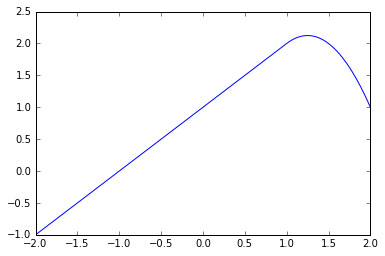

In [371]:
plt.plot(x, y)

# 4

In [366]:
b1_1 = (0 <= x) & (x <= 2)
b1_2 = (1 <= x) & (x <= 2)
b2_1 = (3 <= x) & (x <= 4)
b2_2 = (4 < x) & (x <= 5)

In [368]:
y = 1 + b1_1 - (x - 1) * b1_2 + (x - 3) * b2_1 + b2_2

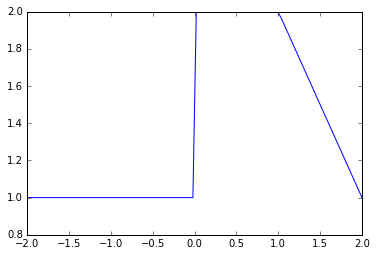

In [369]:
plt.plot(x, y)

# 5
a) g2 will have smaller training error, since it is allowing more flexibility, can have up to a cubic model. g1 will be limited to a quadratic model as $\lambda$ approaches infinity

b) Can't tell which model will have smaller test error this depends on the 'true' relationship between x and y.

c) g1 and g2 will be the same model if there is no penalty

# 6

In [389]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

In [442]:
degrees = range(1, 11)
X = wage[['age']]
y = wage['wage']
final_scores = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    scores = cross_validation.cross_val_score(pipeline,
            X, y, cv=10, scoring='mean_squared_error')
    final_scores.append(-np.mean(scores))

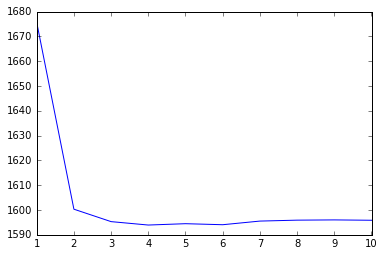

In [443]:
# degree 3 chosen through 10-fold CV
plt.plot(degrees, final_scores);

In [582]:
# compare to anova: already done above. More evidence that 4th and 5th degree polynomial are not needed
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age, 2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data=wage).fit()
anova_lm(mod1, mod2, mod3, mod4, mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [446]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
linear_regression.fit(polynomial_features.fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [451]:
x = np.linspace(X.values.min(), X.values.max(), 1000)

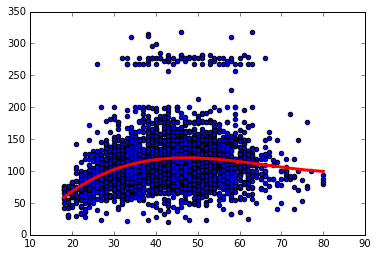

In [460]:
plt.scatter(X, y)
plt.plot(x, linear_regression.predict(polynomial_features.fit_transform(x.reshape(-1, 1))), c='r', lw=3);

In [524]:
from sklearn.preprocessing import LabelBinarizer

In [560]:
cuts = range(1, 41)
X = wage[['age']]
y = wage['wage']
final_scores = []
for cut in cuts:
    lb = LabelBinarizer()
    X_new = lb.fit_transform(pd.cut(X['age'], cut))
    
    linear_regression = LinearRegression(fit_intercept=True if cut in [1, 2] else False)

    scores = cross_validation.cross_val_score(linear_regression, X_new, y, cv=10, scoring='mean_squared_error')
    final_scores.append(-np.mean(scores))

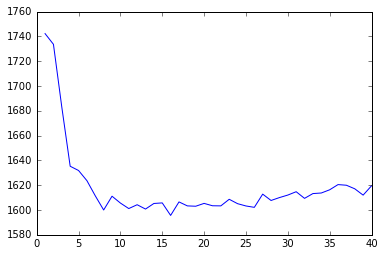

In [561]:
# looks like error stops getting better after 7 cuts
plt.plot(cuts, final_scores);

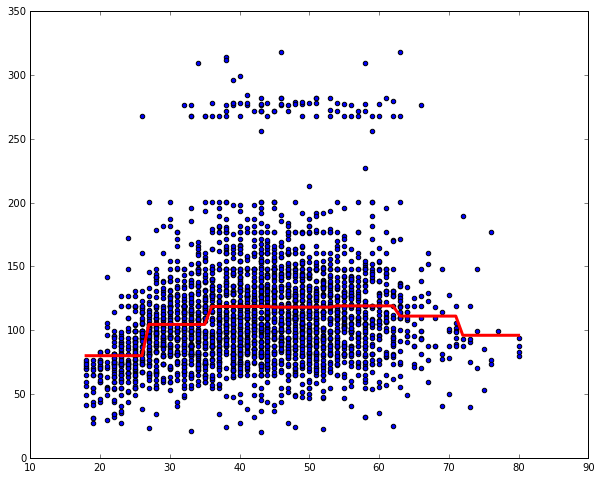

In [581]:
plt.figure(figsize=(10,8))
X_new = lb.fit_transform(pd.cut(X['age'], 7))
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(X_new, y)
plt.scatter(X, y)
order = np.argsort(X['age'])
plt.plot(X['age'].values[order], linear_regression.predict(X_new[order]), c='r', lw=3);

# 7

In [744]:
wage = pd.read_csv('data/wage.csv')

In [748]:
wage[['maritl', 'jobclass']].head()

,maritl,jobclass
0,1. Never Married,1. Industrial
1,1. Never Married,2. Information
2,2. Married,1. Industrial
3,2. Married,2. Information
4,4. Divorced,2. Information


In [749]:
X = pd.get_dummies(wage[['maritl', 'jobclass']], drop_first=False)
y = wage['wage']

In [751]:
X.head()

,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,jobclass_1. Industrial,jobclass_2. Information
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [731]:
linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [732]:
linear_regression.coef_

array([-10.06914129,  15.28671515,  -1.93249277,  -0.40498993,
        -2.88009116,  -8.2615753 ,   8.2615753 ])

In [733]:
linear_regression.intercept_

103.64524662926692

In [734]:
# linear_regression.predict(np.array([[1, 0, 0, 0, 0]]))

In [752]:
import statsmodels.api as sm

In [753]:
results_orig = smf.OLS(y, X).fit()
results_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     72.98
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           2.67e-72
Time:                        18:25:00   Log-Likelihood:                -15277.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2994   BIC:                         3.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
maritl_1. Never Married    19.5438      2.045      9.557      0.000        15.534    23.553
maritl_2. Married          44.8996      1.733     25.911      0.000        41.502    48.297
maritl_3. Widowed          27.6804      7.806      3.546      0.000        12.374    42.987
maritl_4. Divorced         29.2079      2.813     10.385      0.000        23.693    34.723
maritl_5. Separated        26.7328      4.761      5.616      0.000        17.399    36.067
jobclass_1. Industrial     65.7707      1.714     38.368      0.000        62.410    69.132
jobclass_2. Information    82.2939      1.742     47.228      0.000        78.877    85.710
==============================================================================
Omnibus:                     1049.154   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.093
Skew:                           1.652   Prob(JB):                         0.00
Kurtosis:                       8.049   Cond. No.                     1.08e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.85e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [754]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [656]:
wage[wage['maritl'] == '1. Never Married']['wage'].mean()

92.73464859222041

In [755]:
wage[wage['jobclass'] == '1. Industrial']['wage'].mean()

103.32112881497488

In [756]:
wage[wage['jobclass'] == '2. Information']['wage'].mean()

120.59272095804255

In [758]:
wage['jobclass'].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [714]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [715]:
27.6 + 82.3

109.9

In [719]:
X = pd.get_dummies(wage['maritl'] + ' ' + wage['jobclass'])
y = wage['wage']

In [726]:
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     40.91
Date:                Wed, 14 Sep 2016   Prob (F-statistic):           1.97e-69
Time:                        08:10:20   Log-Likelihood:                -15276.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2990   BIC:                         3.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
1. Never Married 1. Industrial     84.6314      2.087     40.551      0.000        80.539    88.724
1. Never Married 2. Information   102.6758      2.312     44.417      0.000        98.143   107.208
2. Married 1. Industrial          110.5215      1.219     90.645      0.000       108.131   112.912
2. Married 2. Information         127.3450      1.230    103.541      0.000       124.933   129.757
3. Widowed 1. Industrial          100.9559     11.384      8.869      0.000        78.636   123.276
3. Widowed 2. Information          97.1091     14.905      6.515      0.000        67.885   126.333
4. Divorced 1. Industrial          96.1082      3.886     24.735      0.000        88.490   103.727
4. Divorced 2. Information        110.3500      3.924     28.123      0.000       102.656   118.044
5. Separated 1. Industrial         99.9341      7.734     12.922      0.000        84.770   115.098
5. Separated 2. Information       102.3649      7.323     13.979      0.000        88.007   116.723
==============================================================================
Omnibus:                     1050.722   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.814
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [725]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [742]:
results.predict([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

array([ 110.3499553])

In [743]:
results_orig.predict([0, 0, 0, 1, 0, 1, 0])

array([ 94.9786814])